In [1]:
import geopandas as gpd
import pandas as pd
#import plotly.express as px

# Exploring pesticide use

In [21]:
ag_chem_county = pd.read_parquet("ag_pesticides_modified.parquet", engine = "fastparquet", columns = ["county_name","lbs_chm_used", "chm_per_acre"])

In [27]:
non_geo = ag_chem_county.groupby("county_name", as_index = False).agg({"lbs_chm_used":"sum"})
county_geo = gpd.read_file("/srv/data/my_shared_data_folder/cpr/california_counties.gpkg", columns = ["NAME","geometry"])

In [28]:
county_merge = pd.merge(county_geo, non_geo, how = "left", left_on = "NAME", right_on="county_name")

<Axes: >

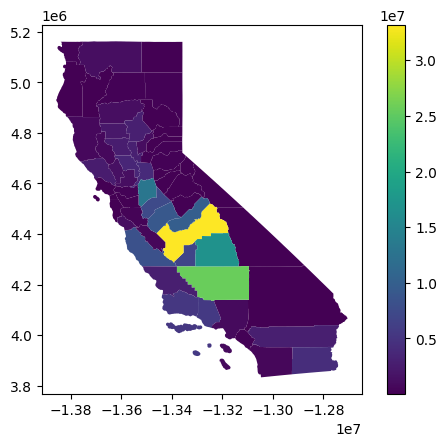

In [30]:
county_merge.plot(column='lbs_chm_used', legend=True)

In [ ]:
# next, look into making interctive maps.... maybe labels yes but also thinking critically about the information you want to convey

In [ ]:
#https://plotly.com/python/mapbox-county-choropleth/